<a href="https://colab.research.google.com/github/alejandraberbesi/Notebooks_ML/blob/main/4_Problemas_de_Regresion_%2B_random_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
from sklearn import datasets #opcion para traer datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

 El conjunto de datos contiene información sobre pacientes con diabetes, incluyendo características como edad, sexo, índice de masa corporal y niveles de varias sustancias en el suero sanguíneo. **La variable objetivo (target) representa una medida de la progresión de la diabetes un año después de las mediciones iniciales**.

Aquí hay una descripción de las características del conjunto de datos:

* age: Edad en años
* sex: Género del paciente
* bmi: Índice de masa corporal
* bp: Presión arterial promedio
* s1: Colesterol total en suero (tc)
* s2: Lipoproteínas de baja densidad (ldl)
* s3: Lipoproteínas de alta densidad (hdl)
* s4: Relación colesterol total / HDL (tch)
* s5: nivel de triglicéridos en suero (ltg)
* s6: Nivel de azúcar en sangre (glu)






Adicional: [mas datasets en libreria scikit learn](https://scikit-learn.org/stable/datasets.html)

In [ ]:
#las variables independientes (X) del dataset original sin escalar es:

pd.DataFrame(data=datasets.load_diabetes(scaled=False).data, columns=datasets.load_diabetes().feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [ ]:
# Cargar el conjunto de datos Diabetes -- variables ya estan escaladas
diabetes_data = datasets.load_diabetes()

# Crear un DataFrame con los datos y las características
diabetes_df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

# Agregar la columna del objetivo (progresión de la enfermedad)
diabetes_df['target'] = diabetes_data.target

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
print(diabetes_df['target'].min())
print(diabetes_df['target'].max())

25.0
346.0


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
round(diabetes_df.describe(),2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


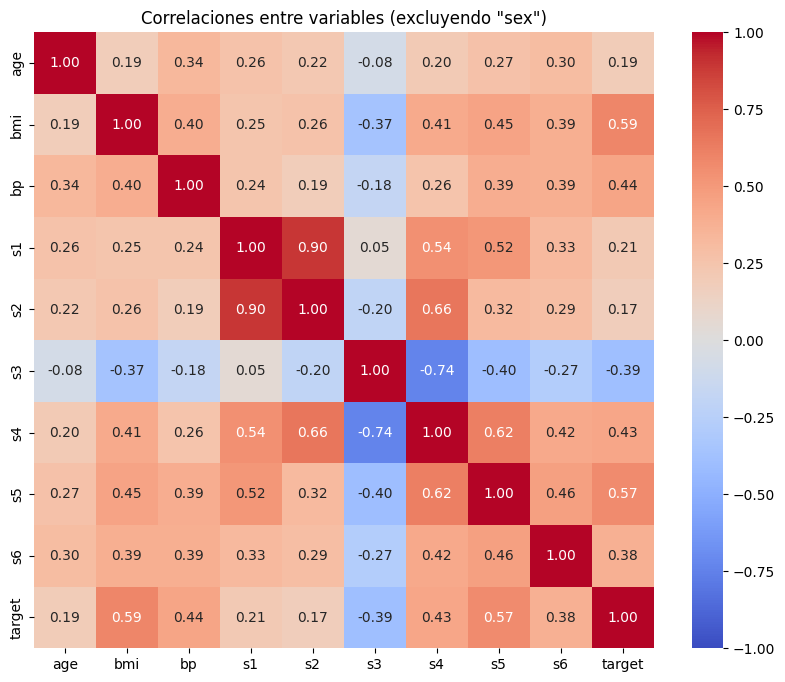

In [ ]:
# Calcular la matriz de correlación
corr_matrix = diabetes_df.drop(columns=['sex']).corr()

# Crear un mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlaciones entre variables (excluyendo "sex")')
plt.show()

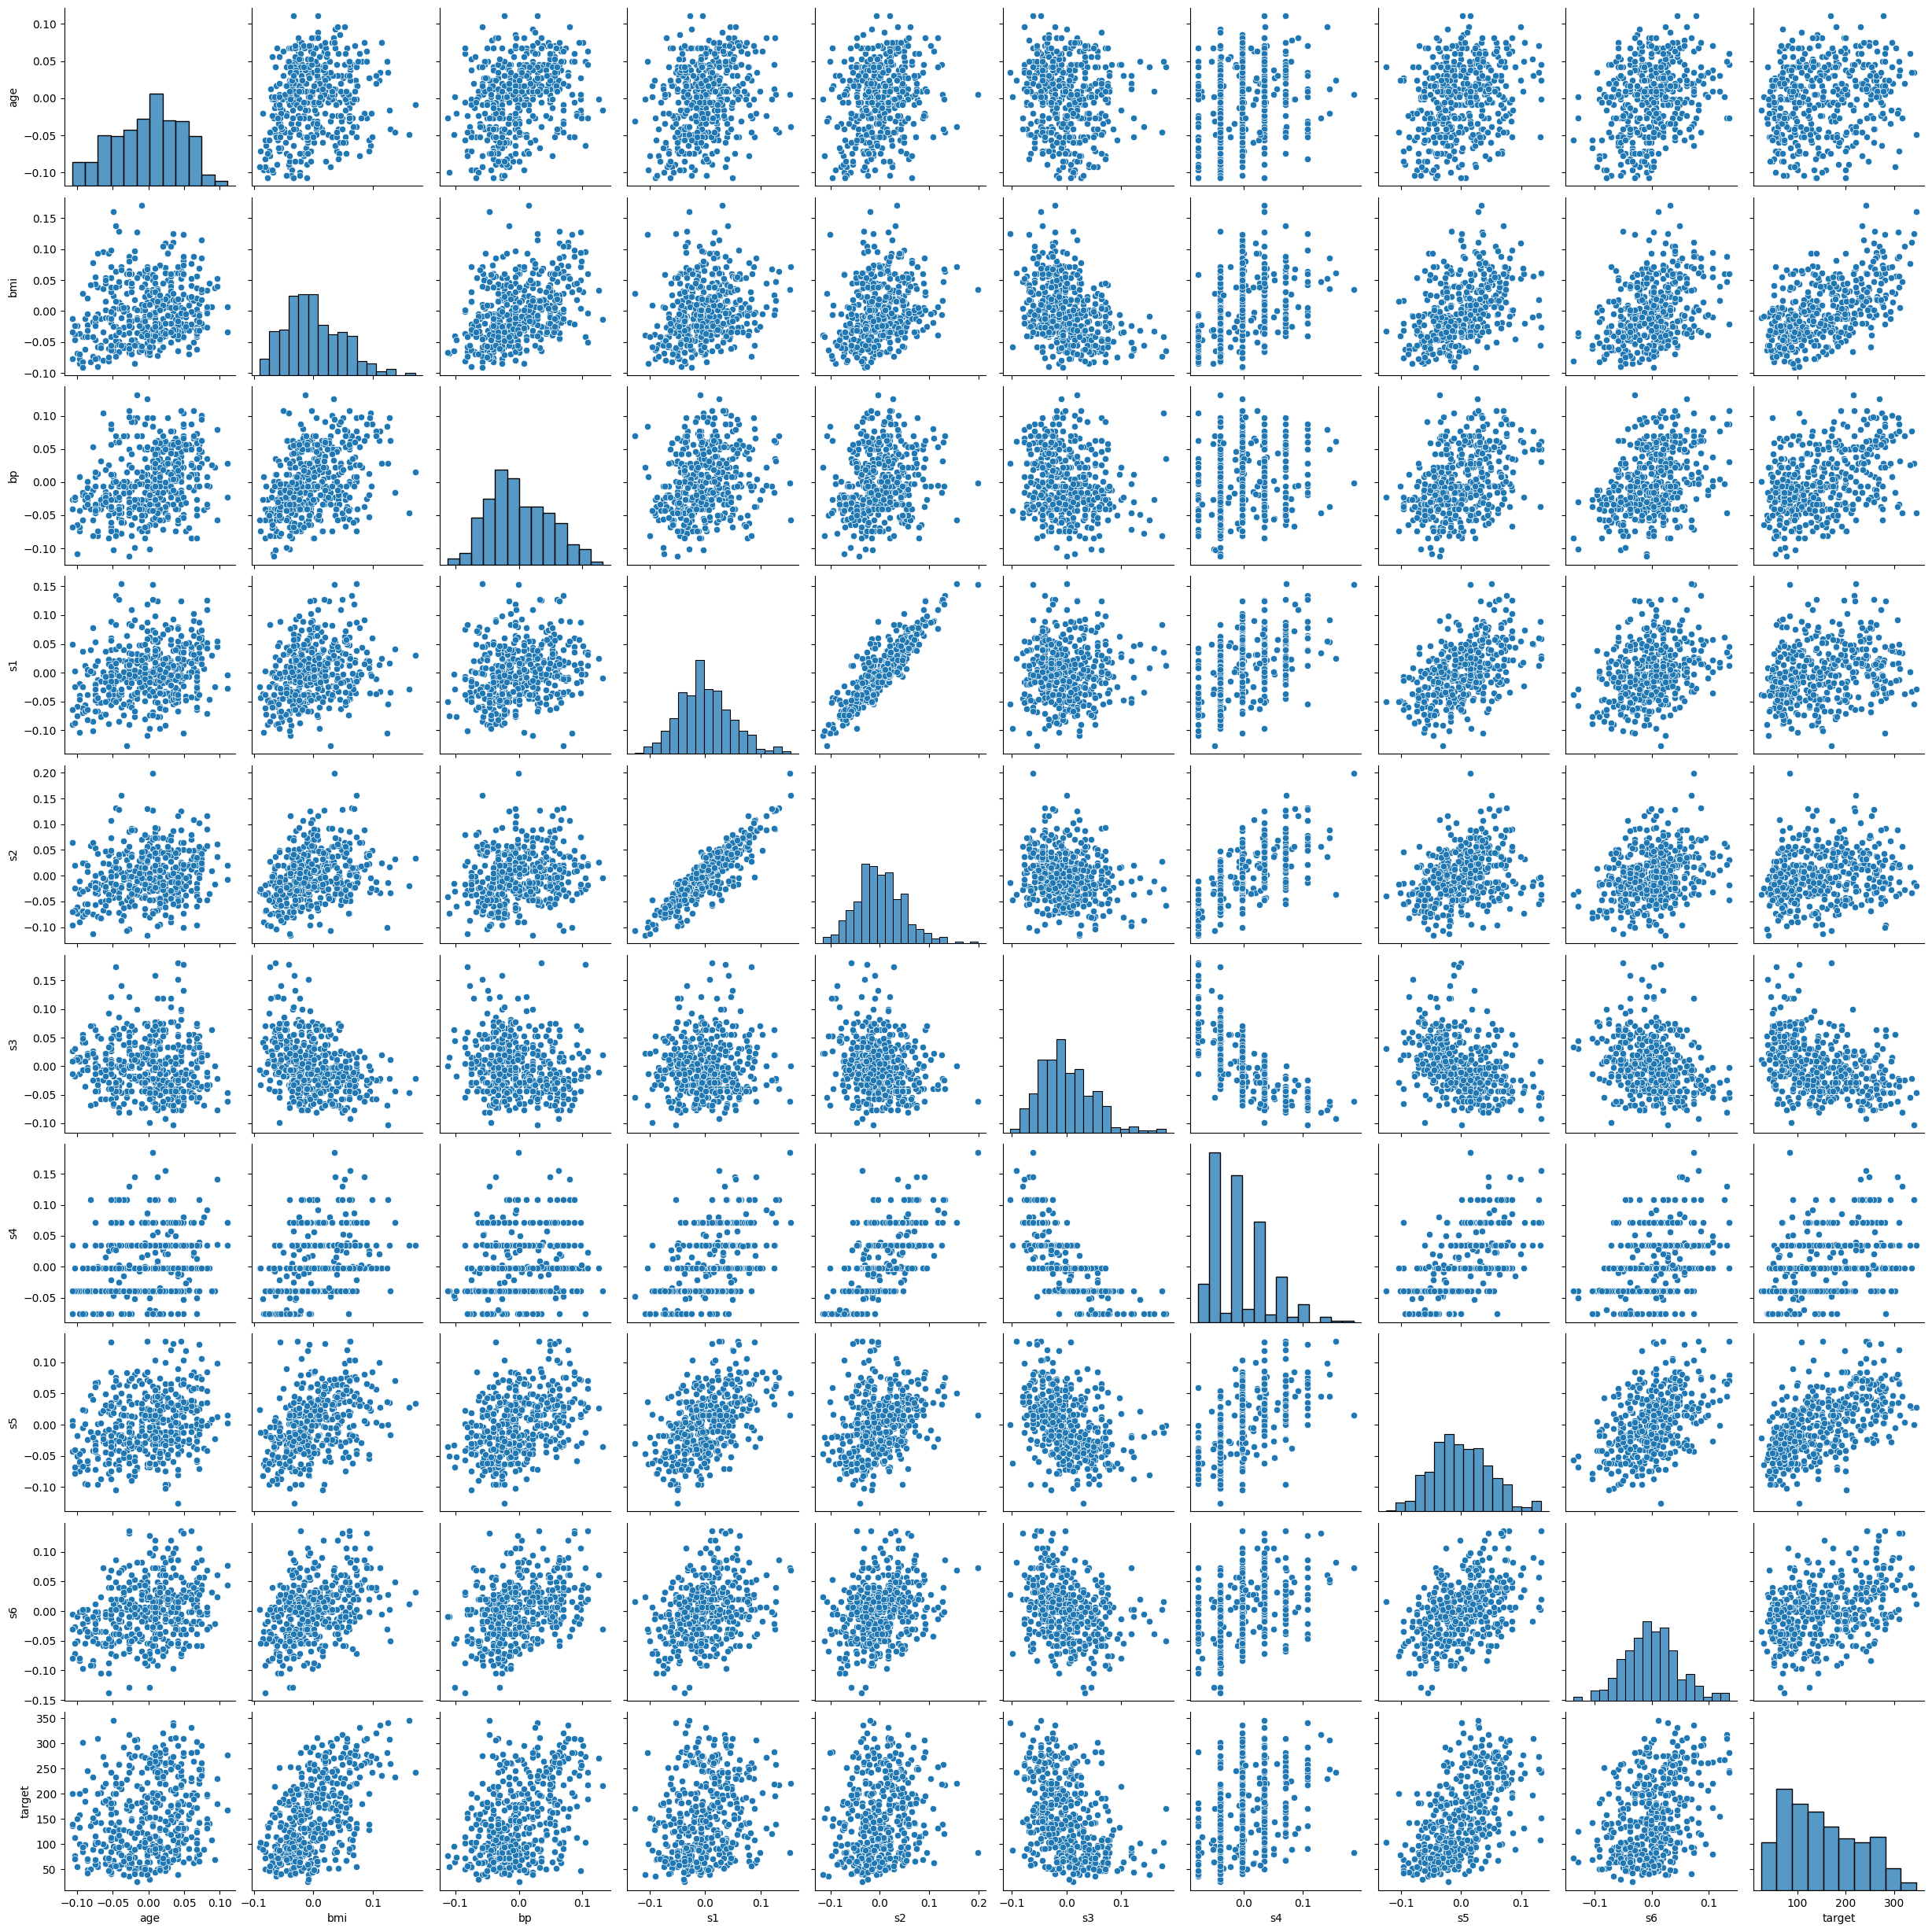

In [ ]:
# Seleccionar todas las columnas excepto 'sex'
features_to_plot = diabetes_df.drop(columns=['sex'])

# Crear un gráfico de pares con Seaborn
sns.pairplot(features_to_plot)

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(diabetes_df.iloc[:,0:10], diabetes_df.iloc[:,10], test_size=0.2, random_state=42)


## Regresion lineal multiple

La regresión lineal múltiple es una técnica en la que tratamos de predecir una variable (llamada variable dependiente) utilizando varias otras variables (llamadas variables independientes). Imagina que queremos predecir el precio de una casa. En lugar de basarnos en una sola característica, como el tamaño de la casa, podríamos considerar múltiples características, como el tamaño, el número de habitaciones, la ubicación, etc.

En la regresión lineal múltiple, asumimos que hay una relación lineal entre las características y el valor que queremos predecir. Por ejemplo, podríamos suponer que, en promedio, el precio de una casa aumenta en cierta cantidad por cada pie cuadrado adicional de tamaño de la casa, y también aumenta por cada habitación adicional.

Entonces, ajustamos un modelo que nos permita expresar esta relación lineal. Este modelo toma la forma de una ecuación, donde tenemos un término para cada característica, multiplicado por un número llamado coeficiente, que representa cuánto influye esa característica en la predicción final.

Después de ajustar el modelo a los datos de entrenamiento (es decir, encontrar los mejores coeficientes que se ajusten a los datos), podemos usar este modelo para predecir los precios de las casas nuevas que no están en nuestros datos de entrenamiento. Para hacer una predicción, simplemente introducimos los valores de las características de una casa en el modelo, y nos dará una estimación del precio de la casa.

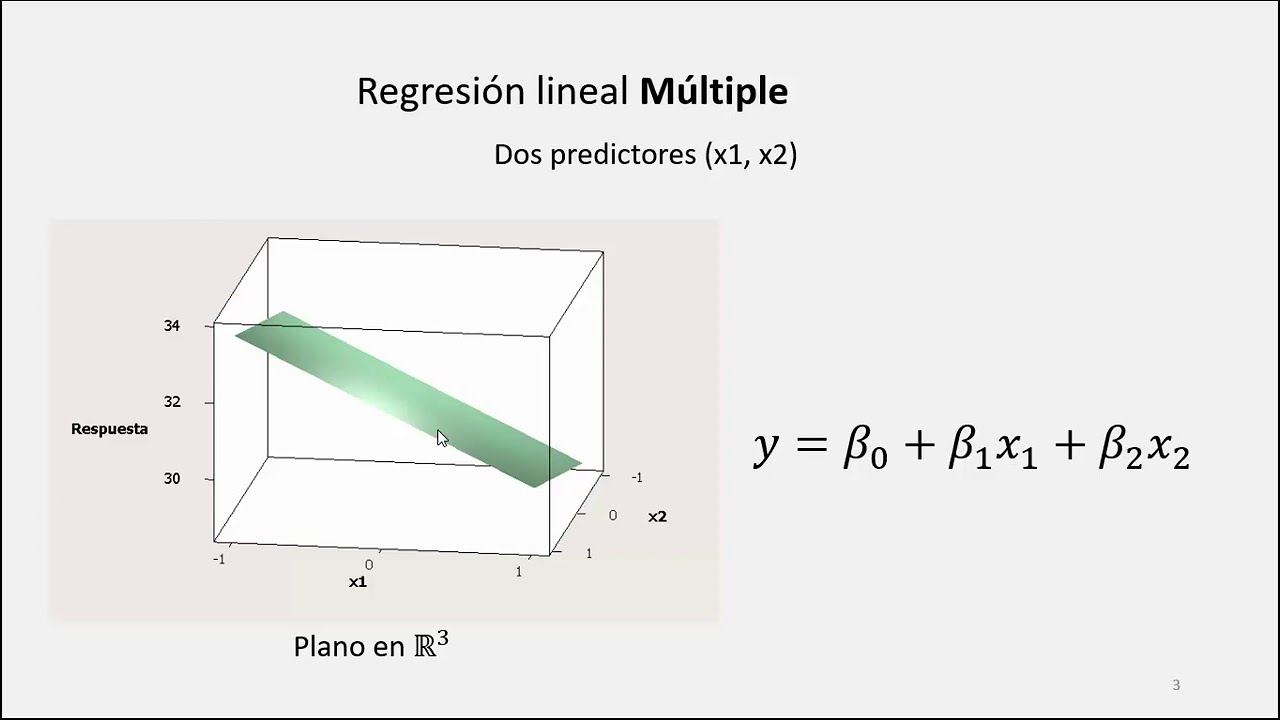

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)


**Error medio absoluto**

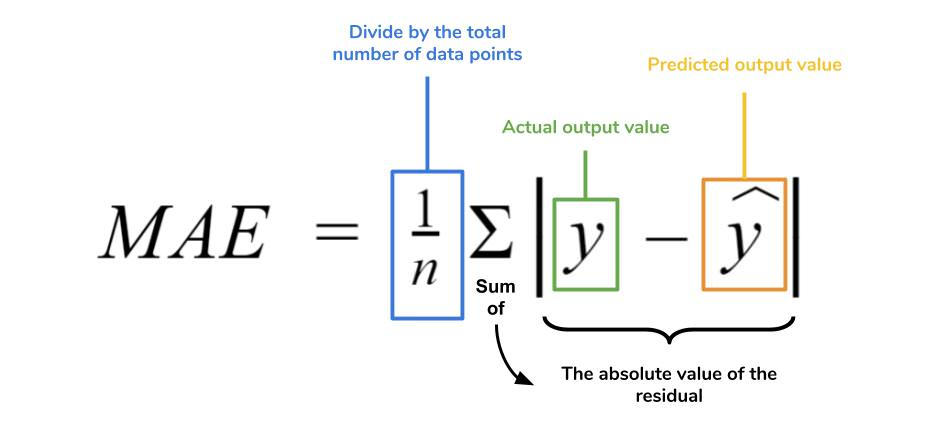

In [ ]:
from sklearn.metrics import mean_absolute_error

print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  42.79409467959994


**Mean squared error**

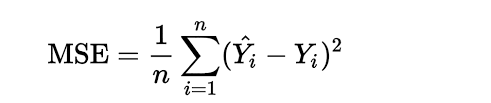

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  2900.193628493482


**Error de raíz cuadrada media (RMSE)**

- El valor de salida que obtiene está en la misma unidad que la variable de salida requerida, lo que facilita la interpretación de la pérdida.

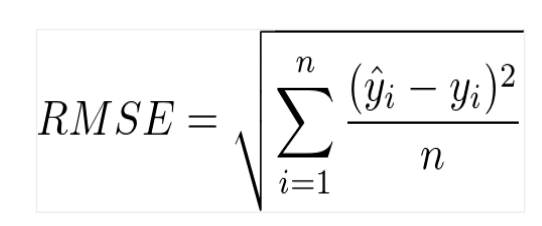

In [ ]:
RMSE_reg=np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
print("RMSE: ",RMSE_reg)

RMSE:  53.85344583676593


**R2**

El R-cuadrado es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada.
R-cuadrado tiene una escala intuitiva, va de 0 a 1, con 1 que el modelo explica bien la variabilidad de los datos y 0 lo contrario.


**Nota**: El R-cuadrado es una medida práctica y aparentemente intuitiva de qué tan bien se ajusta un modelo lineal a un conjunto de observaciones. Sin embargo, es importante complementar esta evaluación con otras estadísticas o métricas, como los gráficos de residuos.

In [ ]:
from sklearn.metrics import r2_score
r2_reg = r2_score(y_test,y_pred)
print(r2_reg)

0.4526027629719195


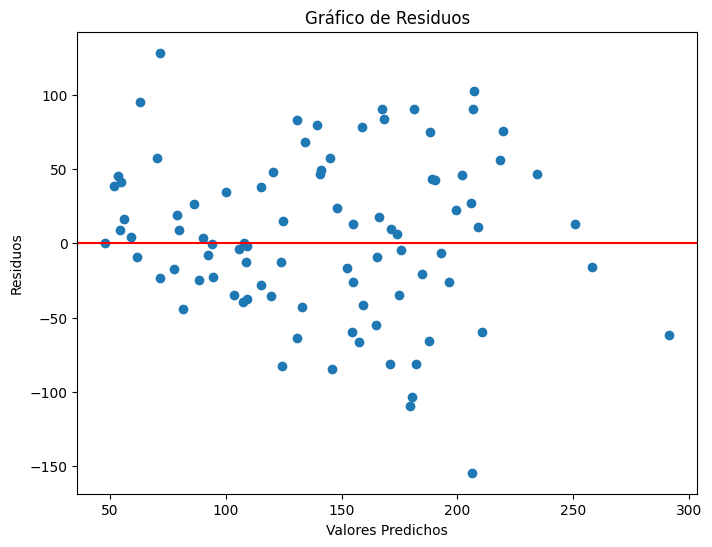

In [ ]:
# Calcular los residuos
residuals = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


Este código calcula los residuos (diferencia entre los valores reales y los valores predichos) y luego grafica los residuos en función de los valores predichos. La línea roja en el gráfico representa la línea de referencia en cero. Un buen modelo debería mostrar residuos distribuidos aleatoriamente alrededor de esta línea. Si hay patrones discernibles en la distribución de los residuos, como una forma de embudo o una tendencia, esto podría indicar que el modelo tiene problemas de ajuste y puede que no sea el que se necesite para captar las relaciones entre las variables X y Y.

**Recurso adicional**: https://www.statology.org/good-vs-bad-residual-plot/

In [ ]:
from sklearn.model_selection import cross_val_score

# Calcular el rendimiento del modelo utilizando validación cruzada
scores = cross_val_score(model,
                         diabetes_df.iloc[:,0:10],
                         diabetes_df.iloc[:,10],
                         cv=5,
                         scoring='neg_mean_absolute_error')*-1

# Mostrar los puntajes de validación cruzada
print("Puntajes de validación cruzada:", scores)
print("Promedio del puntaje de validación cruzada (MAE):", scores.mean())

Puntajes de validación cruzada: [43.02616606 44.8004801  48.1557102  43.0130322  42.3871076 ]
Promedio del puntaje de validación cruzada (MAE): 44.27649923321497


In [ ]:
sklearn.metrics.get_scorer_names() #si quieres cambiar la metrica de desempeño

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

## Random Forest Regressor (Bagging)

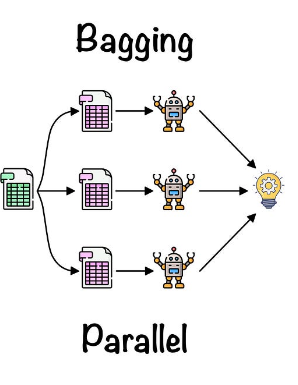

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV #ajuste de hiperparametros

In [ ]:
# Definir el modelo Random Forest Regressor
rf = RandomForestRegressor()

# Definir el espacio de hiperparámetros para Random Search
param_dist = {
    'n_estimators': [100,200,500,1000],
    'max_depth': [10,20,30,40,50],
    'min_samples_split': [2,7, 10],
    'bootstrap': [True, False]
}



```n_estimators```

* Descripción: Número de árboles en el bosque.
* Razón: Más árboles pueden mejorar la precisión del modelo.

```max_depth```

* Descripción: Profundidad máxima de los árboles.
* Razón: Limitar la profundidad ayuda a evitar que el modelo aprenda demasiado los detalles de los datos (sobreajuste).

```min_samples_split```

* Descripción: Número mínimo de muestras necesarias para dividir un nodo.
* Razón: Evita que los árboles se dividan demasiado temprano, lo que puede mejorar la estabilidad del modelo.

```bootstrap```

* Descripción: Si se utilizan muestras con reemplazo (bootstrap) al construir los árboles. Si es False, se utiliza todo el conjunto de datos para construir cada árbol.
* Razón: El muestreo con reemplazo ayuda a que el modelo sea más robusto.

Documentacion: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

¿Cómo funciona `RandomizedSearchCV`?: En lugar de probar todas las combinaciones posibles de hiperparámetros, lo cual puede ser muy costoso computacionalmente, RandomizedSearchCV selecciona aleatoriamente un número fijo de configuraciones para probar.

In [ ]:
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, #Random Forest Regressor
                                   param_distributions=param_dist, #lo definimos hace una celda
                                   n_iter=2, #número de configuraciones de hiperparámetros a probar de forma aleatoria.
                                   cv=5, #se utiliza para evaluar el rendimiento de cada combinación de hiperparámetros
                                   random_state=42)

# Ajustar el modelo Random Forest utilizando Random Search
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados por Random Search
print("Mejores hiperparametros: ", random_search.best_params_)

Mejores hiperparametros:  {'n_estimators': 1000, 'min_samples_split': 10, 'max_depth': 40, 'bootstrap': True}


In [ ]:
# Utilizar el mejor modelo para hacer predicciones
best_rf = random_search.best_estimator_
best_rf

RandomForestRegressor(max_depth=40, min_samples_split=10, n_estimators=1000)

In [ ]:
y_pred = best_rf.predict(X_test)

# Calcular el RMSE
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE del random forest", rmse_rfr)

RMSE del random forest 54.03733326949852


In [ ]:
r2_rfr = r2_score(y_test,y_pred)
r2_rfr

0.4488581064714853

## XGBoost Regressor (Boosting)

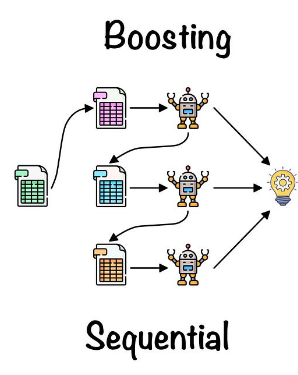

In [ ]:
from xgboost import XGBRegressor


# Definir el modelo XGBoost Regressor
xgb = XGBRegressor()

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [100, 500, 1000],  # Número de árboles
    'max_depth': [3, 6, 9],  # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje:  velocidad a la que nuestro modelo aprende.
                                    #Un valor bajo significa que el modelo aprende despacio y con cuidado,
                          #mientras que un valor alto significa que aprende rápido pero puede cometer errores.
}

Documentacion: https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

In [ ]:
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_dist,
                                   n_iter=2,
                                   cv=5,
                                   random_state=42)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("mejores hiperparámetros: ", random_search.best_params_)

mejores hiperparámetros:  {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1}


In [ ]:
# Utilizar el mejor modelo para hacer predicciones
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

rmse_xgb =  np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE del XGBoost: ",rmse_xgb)

RMSE del XGBoost:  58.58029692750448


In [ ]:
r2_xgb = r2_score(y_test,y_pred)
r2_xgb

0.35229277095066247

## KNN Regressor

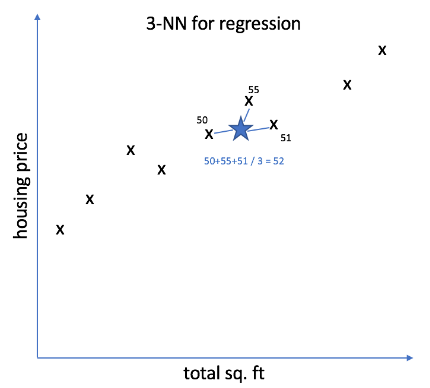

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Definir el modelo KNN Regressor
knn = KNeighborsRegressor()

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],  # Método para asignar pesos a los vecinos
          #'uniform': Todos los puntos en cada vecindario tienen el mismo peso.
          #'distance': En este caso, los vecinos más cercanos tienen más influencia que los que están más lejos.
    'p': [1, 2]  # Parámetro de la distancia (1 para distancia Manhattan, 2 para distancia Euclidiana)
}


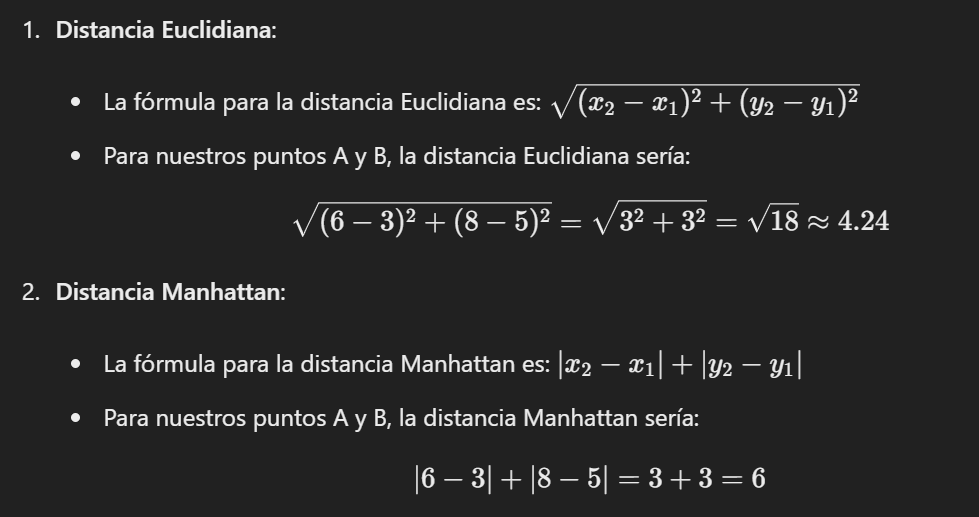

Documentacion: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [ ]:
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist,
                                   n_iter=2, cv=5, random_state=42)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("mejores hiperparámetros: ", random_search.best_params_)

# Utilizar el mejor modelo para hacer predicciones
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Calcular el error cuadrático medio (MSE)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE KNN", rmse_knn)

mejores hiperparámetros:  {'weights': 'distance', 'p': 1, 'n_neighbors': 3}
RMSE KNN 57.701496780305746


In [ ]:
r2_knn = r2_score(y_test,y_pred)
r2_knn

0.37158033806415025

## SVM para regresion

Explicaciones hiperparametros estan en NB pasado:
https://colab.research.google.com/drive/1r53lFrWJVD4T4OggBZLewjUSTKVZmjYp#scrollTo=OuS51Ov9urDK

In [ ]:
from sklearn.svm import SVR

# Definir el modelo SVM Regressor
svm_regressor = SVR()

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
              'C': [0.1, 1, 10, 100],  #regularizacion, entre mas alto da complejo y mas bajo sera mas simple
              'gamma': [1, 0.1, 0.01, 0.001], #influencia de un punto de entrenamiento
              'kernel': ['rbf', 'linear', 'poly'] #tipo de función kernel
}

Documentacion: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm_regressor, param_distributions=param_dist,
                                   n_iter=2, cv=5, random_state=42)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("mejores hiperparámetros: ", random_search.best_params_)

# Utilizar el mejor modelo para hacer predicciones
best_svm_regressor = random_search.best_estimator_
y_pred = best_svm_regressor.predict(X_test)

rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE SVR: ", rmse_svr)

mejores hiperparámetros:  {'kernel': 'linear', 'gamma': 0.1, 'C': 100}
RMSE SVR:  54.61632255022522


In [ ]:
r2_svr = r2_score(y_test,y_pred)
r2_svr

0.4369842861247949

## comparando resultados de RMSE diferentes modelos

In [ ]:
df = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'XGBoost', 'KNN', 'SVR'],
    'RMSE': [RMSE_reg, rmse_rfr, rmse_xgb, rmse_knn, rmse_svr],
    'R2':[r2_reg, r2_rfr, r2_xgb, r2_knn, r2_svr]
})

best_rmse = df['RMSE'].min()
best_r2 = df['R2'].max()

# Función para resaltar las mejores puntuaciones
def highlight_best_score(s, best_var):
    return ['background-color: lightgreen' if v == best_var else '' for v in s]

# Aplicar el estilo al DataFrame
df_style = df.style.apply(highlight_best_score, subset=['RMSE'], best_var=best_rmse)\
                   .apply(highlight_best_score, subset=['R2'], best_var=best_r2)

# Mostrar el DataFrame con estilo
df_style

,Modelo,RMSE,R2
0,Regresión Lineal,53.853446,0.452603
1,Random Forest,54.037333,0.448858
2,XGBoost,58.580297,0.352293
3,KNN,57.701497,0.371580
4,SVR,54.616323,0.436984
